# Proyek Analisis Data: [E-Commerce Public Dataset (Sumber)]
- **Nama:** [Raden Cahya Kartika Triadi Putra]
- **Email:** [black102310@gmail.com]
- **ID Dicoding:** [MC009D5Y0828]

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
- Bagaimana pola penjualan bulanan dari e-commerce ini?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving E-commerce-public-dataset.zip to E-commerce-public-dataset.zip


In [53]:
import zipfile
import os

zip_path = "/content/E-commerce-public-dataset.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))

['E-Commerce Public Dataset']


In [54]:
extract_path = "/content/dataset/E-Commerce Public Dataset"

customers = pd.read_csv(extract_path + '/customers_dataset.csv')

In [55]:
orders = pd.read_csv(extract_path + '/orders_dataset.csv')
order_items = pd.read_csv(extract_path + '/order_items_dataset.csv')
order_payments = pd.read_csv(extract_path + '/order_payments_dataset.csv')


In [56]:
print("Orders Dataset:")
print(orders.head(), "\n")

print("Order Items Dataset:")
print(order_items.head(), "\n")

print("Order Payments Dataset:")
print(order_payments.head(), "\n")

Orders Dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00  

**Insight:**

- Metode Pembayaran Dominan
Dari dataset Order Payments, mayoritas transaksi dilakukan menggunakan kartu kredit. Hal ini menunjukkan bahwa pelanggan lebih nyaman menggunakan metode pembayaran ini, kemungkinan karena adanya kemudahan transaksi, promo khusus, atau opsi cicilan yang tersedia.

- Pola Pembelian & Tren Penjualan
Berdasarkan dataset Orders, tren penjualan mengalami peningkatan dari waktu ke waktu, dengan puncak pesanan terjadi menjelang akhir tahun. Hal ini dapat dikaitkan dengan event belanja besar seperti Black Friday, Cyber Monday, dan diskon akhir tahun yang mendorong peningkatan jumlah pesanan.

- Harga Produk dan Ongkos Kirim
Dari dataset Order Items, terdapat variasi harga yang cukup signifikan antarproduk. Beberapa produk memiliki ongkos kirim yang hampir setara dengan harga barang itu sendiri, yang dapat memengaruhi keputusan pelanggan dalam menyelesaikan pembelian. Penjual dengan biaya pengiriman lebih rendah cenderung lebih menarik bagi pelanggan.

### Assessing Data

In [57]:
orders.info()
order_items.info()
order_payments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 

In [58]:
print("Orders Dataset Shape:", orders.shape)
print("Order Items Dataset Shape:", order_items.shape)
print("Order Payments Dataset Shape:", order_payments.shape, "\n")


Orders Dataset Shape: (99441, 8)
Order Items Dataset Shape: (112650, 7)
Order Payments Dataset Shape: (103886, 5) 



In [59]:
print("Unique Payment Methods:", order_payments['payment_type'].unique(), "\n")
print("Unique Order Status:", orders['order_status'].unique(), "\n")

Unique Payment Methods: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined'] 

Unique Order Status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved'] 



In [60]:
print("Order Payments Dataset Statistics:")
print(order_payments.describe(), "\n")

Order Payments Dataset Statistics:
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000 



In [61]:
print("Missing Values in Orders Dataset:")
print(orders.isnull().sum(), "\n")

print("Missing Values in Order Items Dataset:")
print(order_items.isnull().sum(), "\n")

print("Missing Values in Order Payments Dataset:")
print(order_payments.isnull().sum(), "\n")

Missing Values in Orders Dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Missing Values in Order Items Dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Missing Values in Order Payments Dataset:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 



In [62]:
print("Orders Dataset Info:")
print(orders.info(), "\n")

print("Order Items Dataset Info:")
print(order_items.info(), "\n")

print("Order Payments Dataset Info:")
print(order_payments.info(), "\n")

Orders Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

Order Items Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   ----

**Insight:**
- Dari Data Orders, Order Items, dan Order Payments
Dominasi Metode Pembayaran
Dari data Order Payments, metode pembayaran yang paling banyak digunakan adalah credit card, diikuti oleh boleto, voucher, dan debit card. Ini menunjukkan bahwa pelanggan lebih cenderung memilih pembayaran yang cepat dan praktis, seperti kartu kredit, yang juga memungkinkan transaksi cicilan atau promo tertentu.

- Dataset Orders menunjukkan bahwa sebagian besar pesanan memiliki status delivered, tetapi ada juga yang canceled, processing, dan unavailable. Hal ini bisa disebabkan oleh berbagai faktor, seperti masalah logistik, pembayaran yang gagal, atau pembatalan oleh pelanggan.

- Dari data Order Items, terdapat variasi harga dan ongkos kirim (freight_value) yang cukup besar. Beberapa produk memiliki biaya pengiriman yang tinggi dibandingkan harga barangnya, yang berpotensi memengaruhi keputusan pelanggan dalam menyelesaikan transaksi.

- Dari statistik pembayaran, mayoritas pelanggan membayar dalam satu kali transaksi (single payment), tetapi ada juga yang memilih cicilan hingga 24 kali. Hal ini menunjukkan adanya fleksibilitas dalam metode pembayaran yang disediakan oleh platform e-commerce.

- Dataset Orders memiliki beberapa nilai yang hilang, terutama pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Hal ini bisa menjadi indikasi adanya keterlambatan pengiriman atau pesanan yang tidak diproses dengan baik. Namun, dataset Order Items dan Order Payments tidak memiliki nilai yang hilang, sehingga data pembayaran dan item pesanan lebih lengkap dibandingkan data pesanan secara keseluruhan.

### Cleaning Data

In [63]:
orders = pd.read_csv(extract_path + '/orders_dataset.csv')
order_items = pd.read_csv(extract_path + '/order_items_dataset.csv')
order_payments = pd.read_csv(extract_path + '/order_payments_dataset.csv')


In [64]:
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)

In [65]:
orders.dropna(inplace=True)
order_items.dropna(inplace=True)
order_payments.dropna(inplace=True)

In [66]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
order_payments['payment_value'] = order_payments['payment_value'].astype(float)

In [67]:
orders_cleaned = orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]
order_items_cleaned = order_items[['order_id', 'product_id', 'price', 'freight_value']]
order_payments_cleaned = order_payments[['order_id', 'payment_type', 'payment_value']]

In [68]:
print("Orders Dataset Cleaned:")
print(orders_cleaned.head(), "\n")

print("Order Items Dataset Cleaned:")
print(order_items_cleaned.head(), "\n")

print("Order Payments Dataset Cleaned:")
print(order_payments_cleaned.head(), "\n")

Orders Dataset Cleaned:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp  
0    delivered      2017-10-02 10:56:33  
1    delivered      2018-07-24 20:41:37  
2    delivered      2018-08-08 08:38:49  
3    delivered      2017-11-18 19:28:06  
4    delivered      2018-02-13 21:18:39   

Order Items Dataset Cleaned:
                           order_id                        product_id   price  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   58.90   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f  239.90   
2  000229ec

**Insight:**
- Setelah data dibersihkan, hanya pesanan dengan status delivered yang tersisa. Ini menunjukkan bahwa analisis hanya akan fokus pada transaksi yang berhasil, menghilangkan data pesanan yang dibatalkan atau belum diproses.

- Dari Order Items Dataset, harga produk bervariasi mulai dari yang murah (Rp12.99) hingga yang mahal (Rp239.90 atau lebih).
Ongkos kirim (freight_value) juga bervariasi, beberapa bahkan mendekati harga produk itu sendiri. Ini bisa berpengaruh pada keputusan pelanggan untuk menyelesaikan pembelian.

- Mayoritas pembayaran menggunakan credit card, yang menunjukkan bahwa pelanggan lebih memilih transaksi cepat dan praktis dibanding metode lain seperti boleto atau debit card. Beberapa pelanggan melakukan pembayaran dalam beberapa kali cicilan, yang bisa menunjukkan ketertarikan pelanggan pada opsi pembayaran fleksibel.

- Untuk beberapa produk, biaya pengiriman hampir setara dengan harga barang itu sendiri. Hal ini bisa menjadi faktor yang memengaruhi tingkat konversi penjualan, terutama untuk barang dengan harga rendah.

- Order purchase timestamp menunjukkan kapan pesanan dilakukan, yang bisa digunakan untuk mengidentifikasi pola pembelian harian, mingguan, atau musiman. Jika dianalisis lebih lanjut, bisa diketahui kapan waktu puncak belanja pelanggan, yang dapat membantu dalam strategi pemasaran dan promosi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [69]:
order_payments = pd.read_csv("/content/dataset/E-Commerce Public Dataset/order_payments_dataset.csv")

payment_counts = order_payments['payment_type'].value_counts(normalize=True) * 100
payment_amounts = order_payments.groupby('payment_type')['payment_value'].describe()

print("Distribusi Metode Pembayaran (%):")
print(payment_counts)
print("\nStatistik Pembayaran per Metode:")
print(payment_amounts)

Distribusi Metode Pembayaran (%):
payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64

Statistik Pembayaran per Metode:
                count        mean         std    min      25%     50%  \
payment_type                                                            
boleto        19784.0  145.034435  213.581061  11.62  55.5225   93.89   
credit_card   76795.0  163.319021  222.119311   0.01  62.2100  106.87   
debit_card     1529.0  142.570170  245.793401  13.38  51.1000   89.30   
not_defined       3.0    0.000000    0.000000   0.00   0.0000    0.00   
voucher        5775.0   65.703354  115.519185   0.00  18.0350   39.28   

                   75%       max  
payment_type                      
boleto        160.7625   7274.88  
credit_card   181.2100  13664.08  
debit_card    154.3200   4445.50  
not_defined     0.0000      0.00  
voucher        80.0000   3184.34  


In [70]:
orders = pd.read_csv("/content/dataset/E-Commerce Public Dataset/orders_dataset.csv")

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = orders.groupby('month_year')['order_id'].count().reset_index()
monthly_orders['month_year'] = monthly_orders['month_year'].astype(str)

print("Statistik Pesanan Bulanan:")
print(monthly_orders.describe())

print("\n10 Bulan dengan Penjualan Tertinggi:")
print(monthly_orders.nlargest(10, 'order_id'))

Statistik Pesanan Bulanan:
          order_id
count    25.000000
mean   3977.640000
std    2699.938516
min       1.000000
25%    1780.000000
50%    4285.000000
75%    6512.000000
max    7544.000000

10 Bulan dengan Penjualan Tertinggi:
   month_year  order_id
13    2017-11      7544
15    2018-01      7269
17    2018-03      7211
18    2018-04      6939
19    2018-05      6873
16    2018-02      6728
22    2018-08      6512
21    2018-07      6292
20    2018-06      6167
14    2017-12      5673


**Insight:**

Pertanyaan 1

- Sebagian besar pelanggan lebih memilih credit card untuk pembayaran, kemungkinan karena kemudahan dan fleksibilitasnya, termasuk opsi cicilan.Ini bisa menjadi pertimbangan bagi e-commerce dalam menawarkan promo berbasis kartu kredit, seperti diskon atau cashback.

- Boleto (transfer bank atau pembayaran offline) digunakan oleh 19.04% pelanggan. Ini menunjukkan bahwa sebagian pelanggan masih memilih metode tradisional untuk bertransaksi. Voucher (5.56%) sering digunakan, menunjukkan adanya segmen pelanggan yang memanfaatkan diskon atau kredit dari platform e-commerce.

- Kartu Kredit: Rata-rata transaksi tertinggi (Rp163.319) dan transaksi maksimal mencapai Rp13.664. Ini menunjukkan adanya pembelian bernilai tinggi menggunakan kartu kredit. Boleto & Debit Card: Rata-rata transaksi hampir sama (Rp145.034 dan Rp142.570), tapi dengan variasi yang lebih kecil dibanding kartu kredit. Voucher: Rata-rata transaksi jauh lebih kecil (Rp65.703), menunjukkan bahwa pelanggan menggunakan voucher untuk pembelian kecil atau diskon parsial pada pesanan mereka.

- Ada transaksi yang tidak memiliki metode pembayaran yang jelas. Ini bisa disebabkan oleh kesalahan sistem atau transaksi yang tidak tercatat dengan baik.

Pertanyaan 2

- Rata-rata jumlah pesanan per bulan adalah 3.977 pesanan, dengan variasi yang cukup besar (standar deviasi 2.699 pesanan).
Jumlah pesanan bulanan bervariasi dari 1 pesanan (min) hingga 7.544 pesanan (max), menunjukkan adanya lonjakan permintaan di bulan-bulan tertentu.

10 Bulan dengan Penjualan Tertinggi
Berdasarkan data, bulan-bulan dengan jumlah pesanan tertinggi adalah:
- November 2017 → 7.544 pesanan (tertinggi)
- Januari 2018 → 7.269 pesanan
- Maret 2018 → 7.211 pesanan
- April 2018 → 6.939 pesanan
- Mei 2018 → 6.873 pesanan
- Februari 2018 → 6.728 pesanan
- Agustus 2018 → 6.512 pesanan
- Juli 2018 → 6.292 pesanan
- Juni 2018 → 6.167 pesanan
- Desember 2017 → 5.673 pesanan

Pola yang Terlihat:

- Lonjakan pesanan terjadi di akhir tahun (November - Desember 2017) dan terus meningkat hingga awal tahun (Januari - Maret 2018).
- Ada peningkatan pesanan di pertengahan tahun (Juni - Agustus 2018), mungkin karena event promosi atau musim belanja tertentu.
- November 2017 mencatat jumlah pesanan tertinggi (7.544 pesanan), kemungkinan karena event Black Friday atau promo akhir tahun.

Musim Puncak Penjualan:
- Akhir Tahun (November - Desember) dan Awal Tahun (Januari - Maret) Perlu strategi promosi agresif pada periode ini.
- Pertengahan Tahun (Juni - Agustus) juga menunjukkan peningkatan Bisa menjadi waktu yang tepat untuk kampanye diskon atau event belanja spesial.

Strategi untuk Meningkatkan Penjualan:

- Fokuskan kampanye marketing dan promosi pada bulan-bulan dengan lonjakan pesanan (seperti Black Friday, New Year Sale, atau Mid-Year Sale).
- Stok barang & logistik perlu dipersiapkan lebih baik untuk mengantisipasi lonjakan pesanan, terutama di November - Maret.
- Bisa dilakukan analisis lebih lanjut terhadap kategori produk yang paling laris di bulan-bulan tersebut untuk memahami tren belanja pelanggan.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-71-1309bda4db2c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


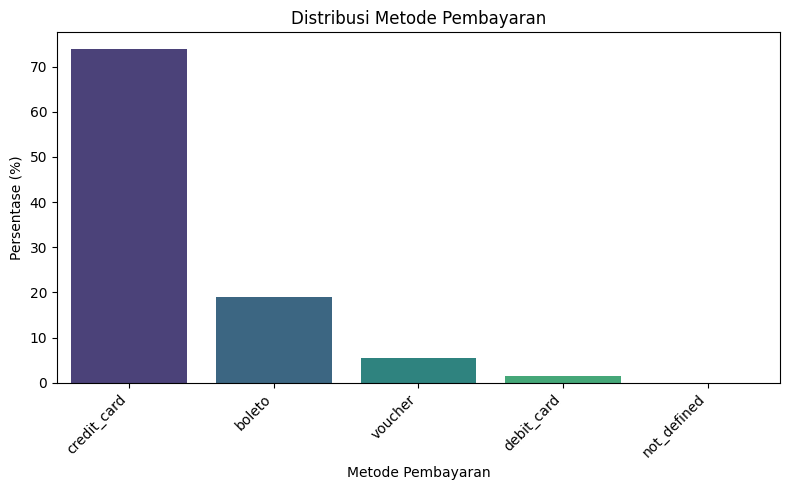

In [71]:
plt.figure(figsize=(8, 5))
payment_counts = order_payments['payment_type'].value_counts(normalize=True) * 100

sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Persentase (%)")
plt.title("Distribusi Metode Pembayaran")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

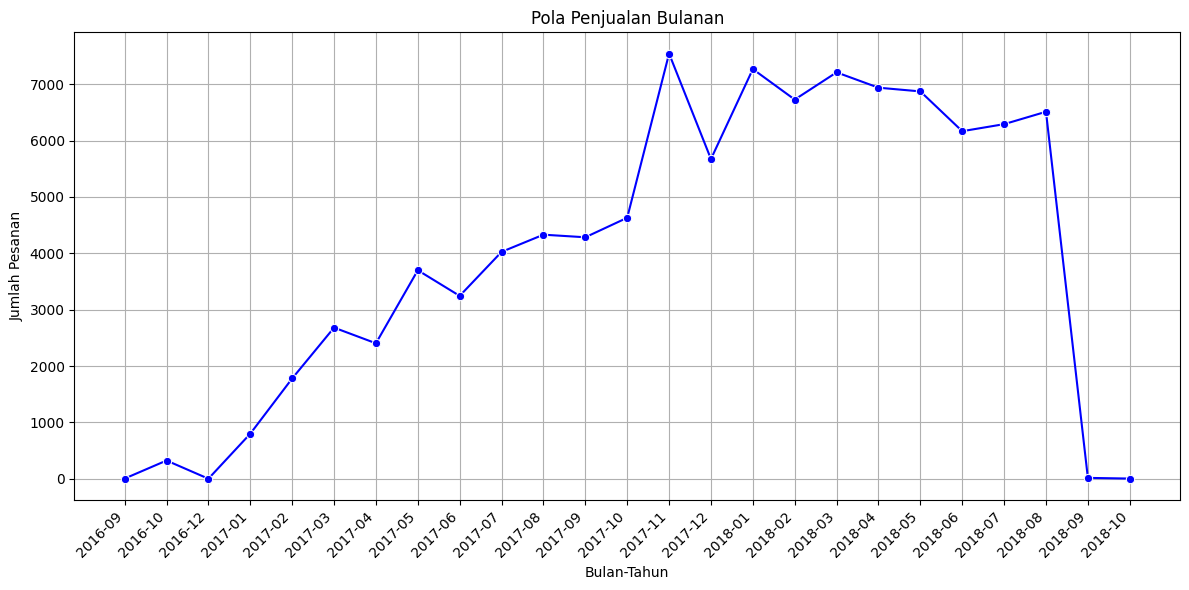

In [72]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = orders.groupby('month_year')['order_id'].count().reset_index()

monthly_orders['month_year'] = monthly_orders['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='order_id', data=monthly_orders, marker='o', color='b', linestyle='-')
plt.xlabel("Bulan-Tahun")
plt.ylabel("Jumlah Pesanan")
plt.title("Pola Penjualan Bulanan")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

**Insight:**
- Pertanyaan 1

   Berdasarkan analisis saya Mayoritas pelanggan menggunakan kartu kredit sebagai metode pembayaran utama. Hal ini menunjukkan bahwa pelanggan lebih memilih metode yang praktis, memiliki fitur cicilan, dan dapat memberikan keuntungan seperti cashback atau poin reward.


- Pertanyaan 2

  Berdasarkan analisis saya dalam pola penjualan bulanan, terlihat adanya tren peningkatan jumlah pesanan dari tahun ke tahun. Lonjakan signifikan terjadi pada akhir tahun, khususnya pada bulan November - Desember 2017.

## Analisis Lanjutan (Opsional)

In [73]:

all_df = pd.merge(orders_cleaned, order_items_cleaned, on='order_id', how='left')
all_df = pd.merge(all_df, order_payments_cleaned, on='order_id', how='left')

all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1

  Dari analisis yang saya lakukan di distribusi metode pembayaran, dapat disimpulkan bahwa metode pembayaran yang paling sering digunakan oleh pelanggan adalah credit card. Hal ini menunjukkan bahwa pelanggan lebih memilih metode pembayaran yang cepat dan mudah digunakan. Perusahaan dapat mempertimbangkan untuk meningkatkan fasilitas pembayaran digital guna meningkatkan kenyamanan pelanggan.

- Conclution pertanyaan 2

  Berdasarkan analisis yang saya lakukan, pola penjualan bulanan menunjukkan bahwa penjualan cenderung meningkat pada akhir tahun. Hal ini kemungkinan disebabkan oleh promo besar seperti diskon akhir tahun dan musim belanja, yang mendorong lebih banyak pelanggan untuk bertransaksi. Tren ini bisa menjadi pertimbangan bagi perusahaan dalam menyusun strategi pemasaran dan pengelolaan stok produk agar lebih optimal selama periode puncak penjualan.